In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test import *
import numpy as np

In [9]:
model_path = "./checkpoints/baseline/iter_1590000.pth.tar"

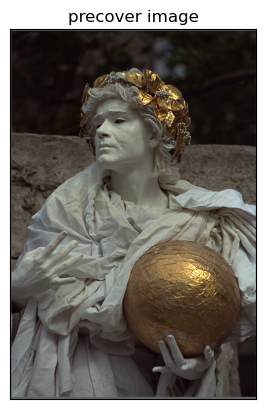

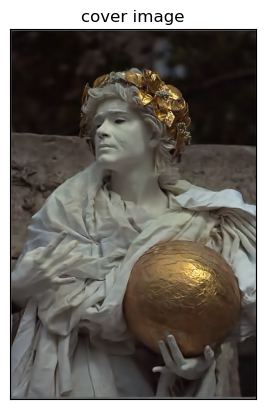

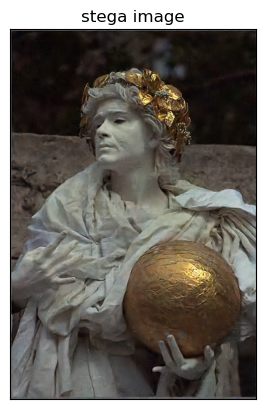

(0.7895311117172241, 35.2210693359375)

In [37]:
test(model_path,selection,plot=True,stega=True,p=0.05)

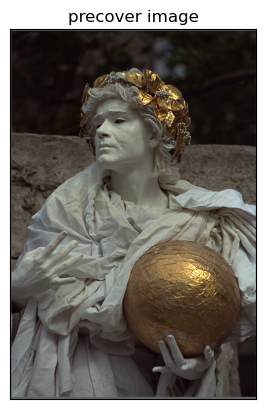

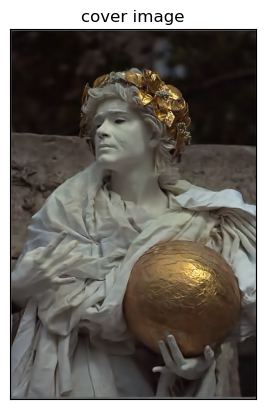

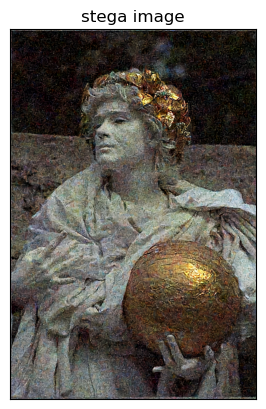

(3.1906847953796387, 23.35984992980957)

In [38]:
# selection = np.random.choice(24,1)
selection = [16]
test(model_path,selection,plot=True,stega=True,p=0.3)

In [102]:
from tqdm import tqdm

P = [0.01*p for p in range(100//3+1)]
P = np.linspace(0.01,1/3,10)

img_selection = range(25)

avg_PSNR_stega_cover = [test(model_path,selection,stega=True,p=p)[1] for p in tqdm(P)]

100%|██████████| 10/10 [02:06<00:00, 12.62s/it]


In [98]:
import math
import numpy as np
import matplotlib.pyplot as plt

def H(p):
    return -2*p*math.log(p,2) - (1-2*p)*math.log(1-2*p,2)

In [92]:
H_p = [H(p) for p in tqdm(P)]

100%|██████████| 10/10 [00:00<00:00, 98457.84it/s]

0.01
0.045925925925925926
0.08185185185185184
0.11777777777777777
0.1537037037037037
0.18962962962962962
0.22555555555555556
0.2614814814814815
0.2974074074074074
0.3333333333333333


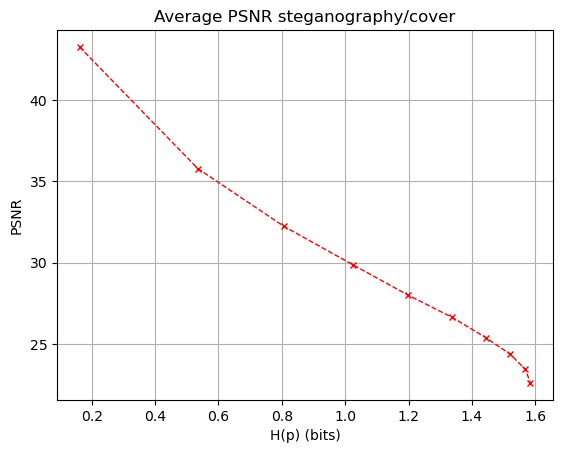

In [104]:
plt.plot(H_p,avg_PSNR_stega_cover,"--xr",markersize=5,lw=1)
plt.title("Average PSNR steganography/cover")
plt.xlabel("H(p) (bits)")
plt.ylabel("PSNR")
plt.grid()
plt.show()

Text(0, 0.5, 'H(p) (bits)')

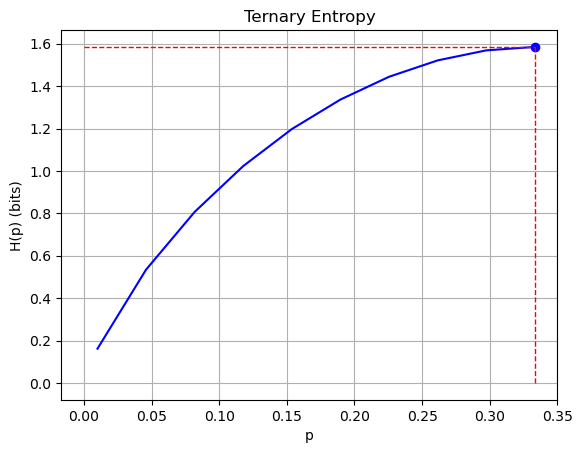

In [100]:
plt.plot(P,H_p,"-b")
plt.title("Ternary Entropy")
plt.plot([1/3],[H(1/3)],"ob")
plt.plot([1/3,1/3],[0,H(1/3)],"--r",lw=1)
plt.plot([0,1/3],[H(1/3),H(1/3)],"--r",lw=1)
plt.grid()
plt.xlabel("p")
plt.ylabel("H(p) (bits)")